In [401]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge

In [402]:
# Read the csv file into a pandas DataFrame
unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/unemployment_rate_clean.csv')
unemployment.head()

,Unnamed: 0,Period,Unemployment(%)
0,0,1948Q1,3.3
1,1,1948Q2,3.3
2,2,1948Q3,3.3
3,3,1948Q4,3.4
4,4,1949Q1,4.1


In [403]:
unemployment = unemployment.drop(columns = ["Unnamed: 0"])

In [404]:
unemployment = unemployment.rename(columns = {
    "Period" : "Period",
    "Unemployment(%)" : "unemployment_rate",
})

In [405]:
unemployment.head(10)

,Period,unemployment_rate
0,1948Q1,3.3
1,1948Q2,3.3
2,1948Q3,3.3
3,1948Q4,3.4
4,1949Q1,4.1
5,1949Q2,5.3
6,1949Q3,6.1
7,1949Q4,6.4
8,1950Q1,5.8
9,1950Q2,5.1


In [406]:
unemployment['date'] = pd.to_datetime([
    '-'.join(x.split()[::-1]) for x in unemployment['Period']])

# datetime.date(2002, 12,4).strftime("%Y%m%d")
# '20021204'


# from datetime import datetime
# unemployment['date'] = unemployment["date"].astype(int)
# datetime_list = []
# for i in range (len(unemployment['date'])):
#     unemployment.append(datetime.strftime(unemployment['date'][i],'%Y%m%d'))


# from datetime import datetime
# unemployment['date'] = unemployment['date'].astype(int)
# datetime_list = []
# for i in range(len(unemployment)):
#     unemployment.append(datetime.strptime(unemployment['date'][i],'%m/%d/%Y'))

In [407]:
unemployment.head()

,Period,unemployment_rate,date
0,1948Q1,3.3,1948-01-01
1,1948Q2,3.3,1948-04-01
2,1948Q3,3.3,1948-07-01
3,1948Q4,3.4,1948-10-01
4,1949Q1,4.1,1949-01-01


In [408]:
unemployment.dtypes

Period                       object
unemployment_rate           float64
date                 datetime64[ns]
dtype: object

In [409]:
X = unemployment.date.values.reshape(-1, 1)
y = unemployment.unemployment_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


Text(0, 0.5, 'Unemployment Rate')

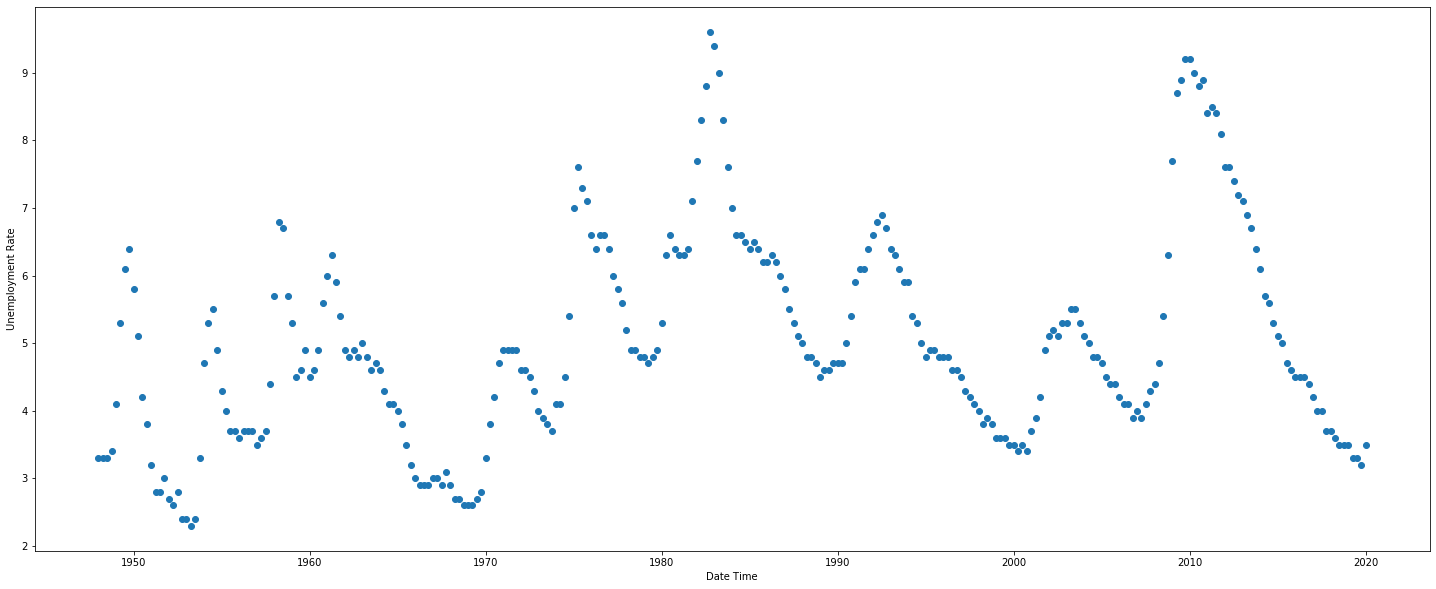

In [410]:
from matplotlib.pyplot import figure
figure (figsize = (25, 10))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("Unemployment Rate")

In [411]:
df = unemployment[["unemployment_rate", "date"]]

In [412]:
forecast_col = "unemployment_rate"

In [413]:
forecast_out = int(math.ceil(0.01*len(df)))

In [414]:
df["label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace = True)

In [415]:
print(df.head())

   unemployment_rate       date  label
0                3.3 1948-01-01    3.4
1                3.3 1948-04-01    4.1
2                3.3 1948-07-01    5.3
3                3.4 1948-10-01    6.1
4                4.1 1949-01-01    6.4


In [451]:
X = np.array(df.drop(["label", "date"],1))
y = np.array(df['label'])

In [464]:
X = preprocessing.scale(X)
y = np.array(df["label"])

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [466]:
clf = svm.SVR("poly")
clf.fit(X_train, y_train)

C:\Users\stroh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [467]:
accuracy = clf.score(X_test, y_test)

In [468]:
print(accuracy)
print (f"Forecast out is = {forecast_out}")

0.35831343241488756
Forecast out is = 3
